# 와인 분류
---
__목표 :__ 와인 종류 분류, 3개의 클래스

## 0. 환경
* Window 10 (Local)
* scikit learn 0.23.2
* numpy 1.20.2
* conda 4.8.3

## 1. 필요한 모듈

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

## 2. 데이터 준비

In [2]:
wines = load_wine()

## 3. 데이터 이해하기

* Feature Data 지정하기

In [3]:
wines_data = wines.data
print(wines_data)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


* Label Data 지정하기

In [4]:
wines_label = wines.target
print(wines_label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


* Target Names 출력

In [5]:
print(wines.target_names)

['class_0' 'class_1' 'class_2']


* 데이터 Discribe

In [6]:
wines.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

## 4. train, test 데이터 분리

In [7]:
# data = 8 : 2 / train : test ratio

X_train, X_test, y_train, y_test = train_test_split(wines_data,
                                                   wines_label,
                                                   test_size = 0.2,
                                                   random_state=16)

## 5. 다양한 모델로 학습시켜보기
* Decision Tree
* Random Forest
* SVM (Support Vector Machine)
* SGD (Stochastic Gradient Descent)
* Logistic Regression

In [8]:
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)

DT_y_pred = decision_tree.predict(X_test)

In [9]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)

RF_y_pred = random_forest.predict(X_test)

In [10]:
svm_model = svm.SVC(kernel='linear')                     
svm_model.fit(X_train, y_train)

SVM_y_pred = svm_model.predict(X_test)

In [11]:
sgd_model = SGDClassifier(loss='modified_huber')
sgd_model.fit(X_train, y_train)

SGD_y_pred = sgd_model.predict(X_test)

In [12]:
logistic_model = LogisticRegression(solver = 'liblinear')
logistic_model.fit(X_train, y_train)

LR_y_pred = logistic_model.predict(X_test)

* sklearn version 0.23.2에서 logistic regression을 사용할 때 버그 발생.
  * solver = 'liblinear'로 사용.

## 6. 모델 평가

### Decision Tree 평가

acc : 0.8333333333333334
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.80      0.73        10
           2       0.86      0.75      0.80        16

    accuracy                           0.83        36
   macro avg       0.84      0.85      0.84        36
weighted avg       0.84      0.83      0.84        36

----------------------------------------------------------------------


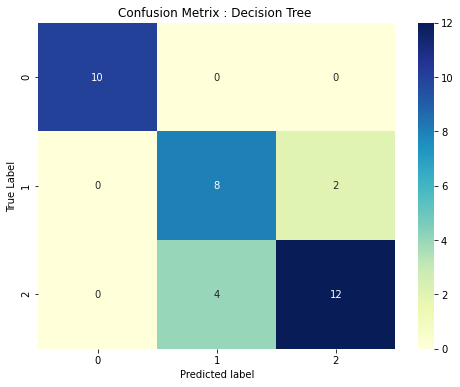

In [13]:
print('acc :',accuracy_score(y_test, DT_y_pred))
print('--'*35)
print(classification_report(y_test, DT_y_pred))
print('--'*35)
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, DT_y_pred)
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt="d")
plt.title("Confusion Metrix : Decision Tree ")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

### Random Forest 평가

acc : 1.0
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        16

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

----------------------------------------------------------------------


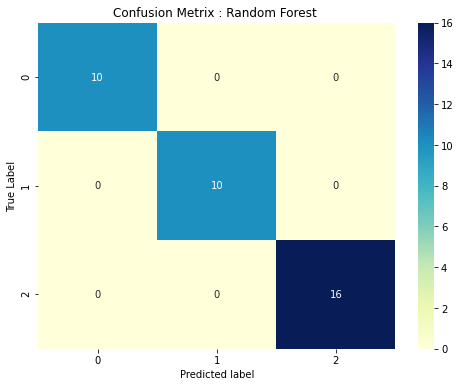

In [14]:
print('acc :',accuracy_score(y_test, RF_y_pred))
print('--'*35)
print(classification_report(y_test, RF_y_pred))
print('--'*35)
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, RF_y_pred)
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt="d")
plt.title("Confusion Metrix : Random Forest ")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

### SVM (Support Vector Machine) 평가

acc : 0.9722222222222222
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.94      1.00      0.97        16

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

----------------------------------------------------------------------


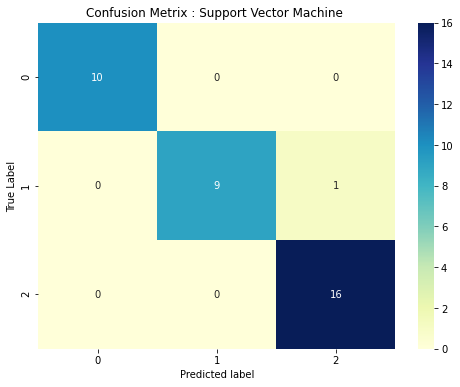

In [15]:
print('acc :',accuracy_score(y_test, SVM_y_pred))
print('--'*35)
print(classification_report(y_test, SVM_y_pred))
print('--'*35)
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, SVM_y_pred)
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt="d")
plt.title("Confusion Metrix : Support Vector Machine ")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

### SGD (Stochastic Gradient Descent) 평가

acc : 0.5
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.41      0.90      0.56        10
           2       0.00      0.00      0.00        16

    accuracy                           0.50        36
   macro avg       0.35      0.60      0.44        36
weighted avg       0.29      0.50      0.36        36

----------------------------------------------------------------------


C:\Users\wjs54\.conda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


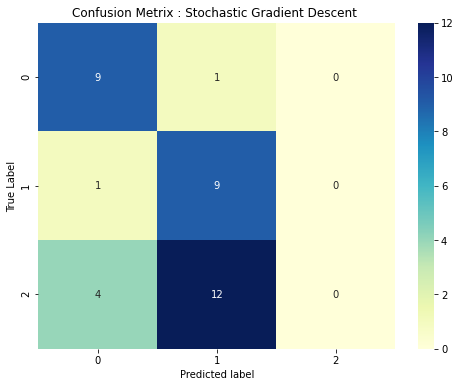

In [16]:
print('acc :',accuracy_score(y_test, SGD_y_pred))
print('--'*35)
print(classification_report(y_test, SGD_y_pred))
print('--'*35)
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, SGD_y_pred)
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt="d")
plt.title("Confusion Metrix : Stochastic Gradient Descent ")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

### Logistic Regression 평가

acc : 0.9444444444444444
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.94      0.94      0.94        16

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36

----------------------------------------------------------------------


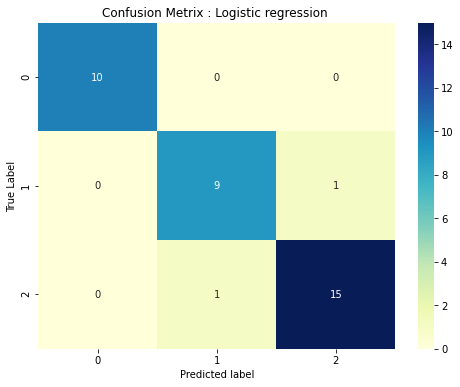

In [17]:
print('acc :',accuracy_score(y_test, LR_y_pred))
print('--'*35)
print(classification_report(y_test, LR_y_pred))
print('--'*35)
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, LR_y_pred)
sns.heatmap(cm, cmap="YlGnBu",annot=True, fmt="d")
plt.title("Confusion Metrix : Logistic regression ")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()

## 7. 정리

### 7.0 precision / recall / f1 score
* suport는 total 178개
* Support Vector Machine과 Stochastic Gradient Descent는 다른 모델의 결과에 비해 낮은 결과치를 확인
* SVM과 SGD는 2번 와인을 정확히 못맞추고 있음. 그래서 평균치를 대폭 낮춤.

### 7.1 confusion metrix
* 0, 1, 2는 와인의 종류를 나타내는데 2번 와인을 1번으로 맞추고 있음.
* SVM과 SGD는 전체적으로 0,1,2 종류의 와인을 분류 못하고 있음.
     
### 7.2 생각
* 추가적으로 생각해야 될 것은 SVM과 SGD model이 왜 맞추지 못하는지 찾아봐야 될 것 같음.
 * SVM은 kernel의 기본값이 'rbf'로 되어있었음. 이것을 'linear'로 변경하니 제대로 맞췄음.
   * linear로 변경하면서 어떻게 값이 제대로 나오는지 아직 명확히 이해하지 못함.
 * SGD는 y_pred와 y_test에서 문제 발생(원인은 모르겠음)
   * label(class 1, 2)이 나오지 않는 현상이 생기는데 이럴때 precision, recall, f1-score가 계산되지 않아서 문제 발생
   * 0과 1만 나오거나 0과 2만 나와서 1 또는 2을 제외하고 분류하기 때문에 accuracy가 올라갈 수 있음.
* Random Forest(ensemble)가 5개의 모델 중에서 제일 분류가 잘됨.